<a href="https://colab.research.google.com/github/Shivang-Quantum/QuantaPytha/blob/Tutort/Deep%20Learning/CatDogClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
cd /content/drive/MyDrive/Tutort/datasets/


/content/drive/MyDrive/Tutort/datasets


In [3]:
#unzip file

!unzip archive_Cat_Dog.zip

Archive:  archive_Cat_Dog.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [9]:
training_path="/content/drive/MyDrive/Tutort/datasets/training_set/training_set"
testing_path="/content/drive/MyDrive/Tutort/datasets/test_set/test_set"

In [10]:
train_datagen=ImageDataGenerator(rescale=1/255,horizontal_flip=True)

In [11]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_datagen

In [12]:
training_set = train_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=32,class_mode="binary")
testing_set = test_datagen.flow_from_directory(training_path,target_size=(64,64),batch_size=32,class_mode="binary")

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [13]:
# checking the data
sample_data=next(training_set)

In [ ]:
sample_data

(array([[[[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.8705883 , 0.86666673, 0.8588236 ],
          ...,
          [0.8470589 , 0.8431373 , 0.82745105],
          [0.854902  , 0.85098046, 0.8352942 ],
          [0.8078432 , 0.78823537, 0.77647066]],
 
         [[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.87843144, 0.8745099 , 0.86666673],
          ...,
          [0.8431373 , 0.83921576, 0.8235295 ],
          [0.854902  , 0.85098046, 0.8352942 ],
          [0.8078432 , 0.78823537, 0.77647066]],
 
         [[0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          [0.8745099 , 0.8705883 , 0.86274517],
          ...,
          [0.854902  , 0.8352942 , 0.8235295 ],
          [0.86274517, 0.8431373 , 0.8313726 ],
          [0.8078432 , 0.7843138 , 0.7843138 ]],
 
         ...,
 
         [[0.75294125, 0.6901961 , 0.6392157 ],
          [0.70196

In [ ]:
sample_data[0].shape

(32, 64, 64, 3)

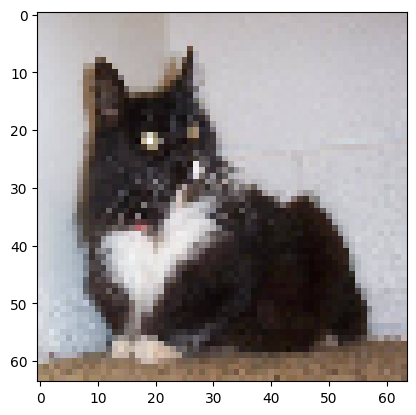

In [14]:
plt.imshow(sample_data[0][31])

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3)))
classifier.add(MaxPooling2D())

classifier.add(Conv2D(32,(3,3)))
classifier.add(MaxPooling2D())

classifier.add(Flatten())

classifier.add(Dense(128))

classifier.add(Dense(64))

classifier.add(Dense(1,activation="sigmoid"))

In [22]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [23]:
classifier.fit(training_set, epochs=2, validation_data=testing_set)

Epoch 1/2
251/251 [==============================] - 1620s 6s/step - loss: 0.6768 - accuracy: 0.6286 - val_loss: 0.5726 - val_accuracy: 0.7079
Epoch 2/2
251/251 [==============================] - 152s 608ms/step - loss: 0.5871 - accuracy: 0.6907 - val_loss: 0.5358 - val_accuracy: 0.7313


In [24]:
classifier.save('/content/drive/MyDrive/Tutort/Deploy/CDClassifier.keras')

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [27]:
model_path="/content/drive/MyDrive/Tutort/Deploy/CDClassifier.keras"
model=load_model(model_path)

In [37]:
# input size = 32,64,64,3 - 4 Dim

image_path="/content/drive/MyDrive/Tutort/datasets/Predict_Image/Image_05.jpg"
test_image=image.load_img(image_path, target_size=(64,64))
print(test_image)
test_image = image.img_to_array(test_image)
print(test_image.shape)
test_image = test_image.reshape(1,64,64,3)
print(test_image.shape)
result = model.predict(test_image)
print(result)
if result == 1:
  print("Dog")
else:
  print("Cat")

<PIL.Image.Image image mode=RGB size=64x64 at 0x7B3E282B0C10>
(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 22ms/step
[[1.]]
Dog
